In [1]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras import models, layers
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions

from IPython import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import asarray
from PIL import Image
import seaborn as sns
import cv2
import os
import glob

# Test 1 image

In [2]:
test_img = Image.open('data/shells/12-02-34-112932.png')

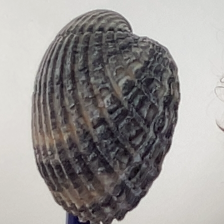

In [3]:
test_img

In [4]:
img_array = np.array(test_img)
img_array


array([[[221, 220, 216],
        [221, 220, 216],
        [223, 221, 217],
        ...,
        [215, 216, 213],
        [214, 215, 212],
        [214, 215, 212]],

       [[223, 221, 217],
        [221, 220, 216],
        [221, 220, 216],
        ...,
        [214, 215, 212],
        [214, 215, 212],
        [215, 216, 213]],

       [[223, 221, 217],
        [221, 220, 216],
        [221, 220, 216],
        ...,
        [214, 215, 212],
        [214, 215, 212],
        [215, 216, 213]],

       ...,

       [[203, 200, 194],
        [202, 199, 193],
        [203, 200, 194],
        ...,
        [193, 189, 184],
        [192, 188, 182],
        [190, 187, 181]],

       [[202, 199, 193],
        [202, 199, 193],
        [202, 199, 193],
        ...,
        [192, 188, 182],
        [190, 187, 181],
        [190, 187, 181]],

       [[201, 198, 192],
        [201, 198, 192],
        [201, 198, 192],
        ...,
        [190, 187, 181],
        [190, 187, 181],
        [190, 187, 181]]

In [5]:
img_array.size

150528

In [6]:
img_array.shape

(224, 224, 3)

# Import Photos

In [7]:
class1 = ['shells']#,'stones']
class2 = ['stones']
class3 = ['bananas']
base_path1 = 'data/shells'
base_path2 = 'data/stones'
base_path3 = 'data/banana'


In [8]:
pwd

'/Users/karenbolon/Documents/spiced_projects/sandbox_dir/image_classifier'

Test for valid path

In [9]:
PATH = 'data/shells/12-02-34-112932.png'
if os.path.isfile(PATH) and os.access(PATH, os.R_OK):
    print("File exists and is readable")
else:
    print("Either the file is missing or not readable")

File exists and is readable


In [10]:
shells = [f'{base_path1}/{i}' for i in os.listdir(base_path1)]

photos_train = []
control_train = []

#0 is shell

for i, target in enumerate(class1):

    for file in shells:
        if file.endswith('.png'):
             # load the image    
#            img = image.load_img(file, target_size = (224,224))    
            img = Image.open(file).convert('RGB')
             # convert it to an array
            img_array = np.array(img)
             # append the array to X
            photos_train.append(img_array)
            control_train.append(0)
        else:
            continue


       

In [11]:
img_array.dtype

dtype('uint8')

In [12]:
img_array.shape

(224, 224, 3)

In [13]:
stones = [f'{base_path2}/{i}' for i in os.listdir(base_path2)]

#1 is stone

for i, target in enumerate(class2):

    for file in stones:
        if file.endswith('.png'):
             # load the image     
            img = Image.open(file).convert('RGB')
             # convert it to an array
            img_array = np.array(img)
             # append the array to X
            photos_train.append(img_array)
            control_train.append(1)
        else:
            continue
         # append the numeric target to y

In [14]:
bananas = [f'{base_path3}/{i}' for i in os.listdir(base_path3)]

#2 is banana

for i, target in enumerate(class3):

    for file in bananas:
        if file.endswith('.png'):
             # load the image     
            img = Image.open(file).convert('RGB')
             # convert it to an array
            img_array = np.array(img)
             # append the array to X
            photos_train.append(img_array)
            control_train.append(2)
        else:
            continue
         # append the numeric target to y

In [15]:
X=np.array(photos_train).astype(np.float32)
y=np.array(control_train)


In [16]:
X.shape

(300, 224, 224, 3)

In [17]:
X.dtype

dtype('float32')

In [18]:
#y.shape[1]

In [19]:
X[1].shape

(224, 224, 3)

In [20]:
y = to_categorical(y)

In [21]:
# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

In [22]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((240, 224, 224, 3), (240, 3), (60, 224, 224, 3), (60, 3))

In [24]:
y_train.dtype

dtype('float32')

In [25]:
# One hot encode the labels:
# Keep a copy of y test as the actual number labels:
ytest_true = y_test.copy()

In [26]:
# Clear session and build model:
K.clear_session()

model = Sequential([
    Conv2D(filters = 20, kernel_size = (3,3), strides = (1,1), padding = "valid", activation = "relu" ,input_shape = (224,224,3)),
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = "valid"),

    
    Conv2D(filters = 20, kernel_size = (3,3), strides = (1,1), padding = "valid", activation = "relu"),
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = "valid"),
    
    Flatten(),
    
    #Fully connected layers:
    
    Dense(20,activation='relu'),
    Dropout(0.2),# - optional
    
    #Output layer:
    Dense(3 ,activation= "softmax")

    
])

In [27]:
# Check the summary:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 20)      560       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 20)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 20)      3620      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 20)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 58320)             0         
                                                                 
 dense (Dense)               (None, 20)                1

In [28]:
# Compile the model
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
# Early stopping:
early_stop = keras.callbacks.EarlyStopping(
    monitor='accuracy', #the thing we are monitoring
    min_delta=0.0005, #the minimum change in the quantity that we want for the model to train for another epoch
    patience=3, #number of epochs with no improvement needed for the model to stop
    verbose=1, #0 is silent, 1 means a message is displayed when something happens
    mode='auto'  
)

In [30]:
# Fit the model
history = model.fit(X_train,y_train,batch_size=40, epochs=100,validation_split=0.2, callbacks = [early_stop])

Epoch 1/100
5/5 [==============================] - 1s 218ms/step - loss: 597.0519 - accuracy: 0.3073 - val_loss: 95.9765 - val_accuracy: 0.3125
Epoch 2/100
5/5 [==============================] - 1s 187ms/step - loss: 31.8995 - accuracy: 0.4010 - val_loss: 5.4214 - val_accuracy: 0.3125
Epoch 3/100
5/5 [==============================] - 1s 188ms/step - loss: 1.8770 - accuracy: 0.3646 - val_loss: 1.0987 - val_accuracy: 0.3125
Epoch 4/100
5/5 [==============================] - 1s 185ms/step - loss: 1.0950 - accuracy: 0.3281 - val_loss: 2.9061 - val_accuracy: 0.3958
Epoch 5/100
5/5 [==============================] - 1s 188ms/step - loss: 1.5761 - accuracy: 0.3385 - val_loss: 1.0988 - val_accuracy: 0.3125
Epoch 5: early stopping


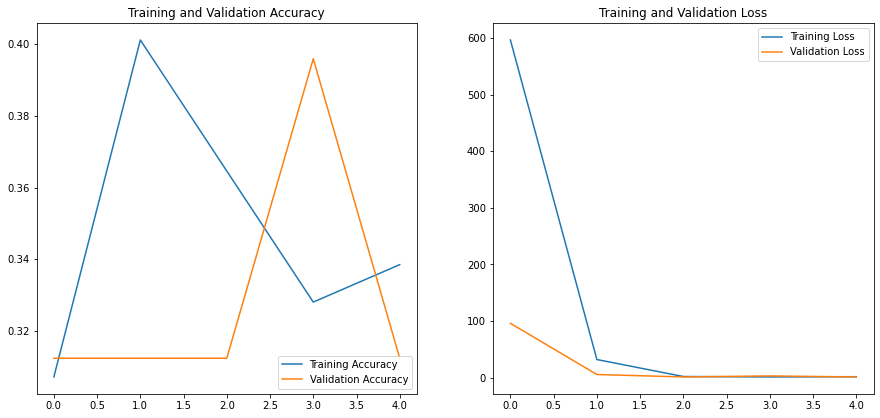

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
predictions = model.predict(X_train)
predictions.shape

(240, 3)

In [34]:
#predictions = predictions.reshape(1,-1)[0]

In [35]:
#predictions.shape

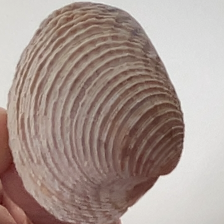

In [36]:
image_path = 'data/mystery1.png'
im =image.load_img(image_path, target_size = (224, 224))
#            img = image.load_img(file, target_size = (224,224))  
im

In [37]:
im.size

(224, 224)

In [38]:
numpy_image = np.array(im)
numpy_image.shape

(224, 224, 3)

In [39]:
image_batch = np.expand_dims(numpy_image, axis=0)
image_batch.shape

(1, 224, 224, 3)

In [40]:
processed_image = keras.applications.vgg16.preprocess_input(image_batch)

In [41]:
prediction1 = model.predict(processed_image)
prediction1.shape

(1, 3)

In [42]:
prediction1

array([[0.3324377 , 0.33264223, 0.33492005]], dtype=float32)